In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv(r"D:\Excel\flight_Data\Clean_Dataset.csv")
print(df)

        Unnamed: 0   airline   flight source_city departure_time stops  \
0                0  SpiceJet  SG-8709       Delhi        Evening  zero   
1                1  SpiceJet  SG-8157       Delhi  Early_Morning  zero   
2                2   AirAsia   I5-764       Delhi  Early_Morning  zero   
3                3   Vistara   UK-995       Delhi        Morning  zero   
4                4   Vistara   UK-963       Delhi        Morning  zero   
...            ...       ...      ...         ...            ...   ...   
300148      300148   Vistara   UK-822     Chennai        Morning   one   
300149      300149   Vistara   UK-826     Chennai      Afternoon   one   
300150      300150   Vistara   UK-832     Chennai  Early_Morning   one   
300151      300151   Vistara   UK-828     Chennai  Early_Morning   one   
300152      300152   Vistara   UK-822     Chennai        Morning   one   

         arrival_time destination_city     class  duration  days_left  price  
0               Night           

In [5]:
df.shape

(300153, 12)

In [6]:
df.head(4)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955


In [7]:
df.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [9]:
# Convert price column to numpy array
prices = df['price'].values

# Basic statistics using numpy
mean_price = np.mean(prices)
median_price = np.median(prices)
std_price = np.std(prices)
min_price = np.min(prices)
max_price = np.max(prices)

print("📊 Flight Price Statistics")
print(f"Mean Price   : {mean_price:.2f}")
print(f"Median Price : {median_price:.2f}")
print(f"Std Dev      : {std_price:.2f}")
print(f"Min Price    : {min_price}")
print(f"Max Price    : {max_price}")

# Correlation between numeric features (duration, days_left, price)
numeric_data = df[['duration', 'days_left', 'price']].values
correlation_matrix = np.corrcoef(numeric_data.T)
print("\n🔗 Correlation Matrix (duration, days_left, price):")
print(correlation_matrix)

📊 Flight Price Statistics
Mean Price   : 20889.66
Median Price : 7425.00
Std Dev      : 22697.73
Min Price    : 1105
Max Price    : 123071

🔗 Correlation Matrix (duration, days_left, price):
[[ 1.         -0.03915688  0.20422237]
 [-0.03915688  1.         -0.09194853]
 [ 0.20422237 -0.09194853  1.        ]]


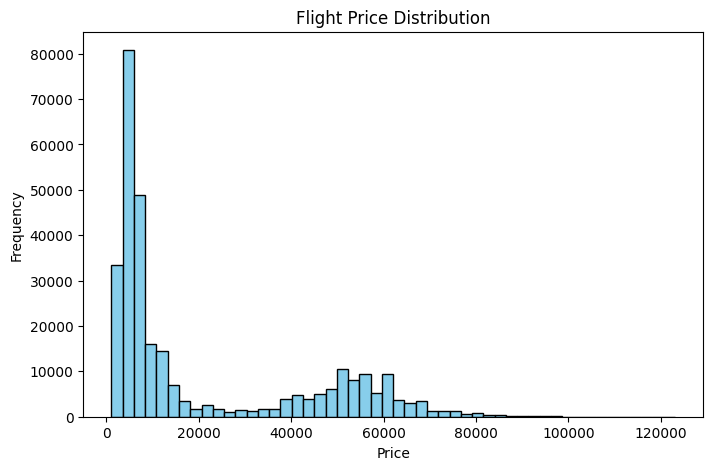

In [10]:
# Histogram - Price distribution
plt.figure(figsize=(8,5))
plt.hist(prices, bins=50, color="skyblue", edgecolor="black")
plt.title("Flight Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

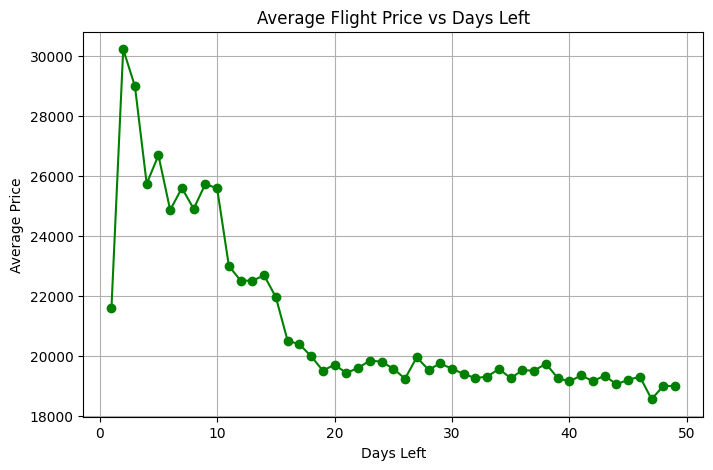

In [11]:
# Line Chart - Avg Price vs Days Left
avg_price_days = df.groupby("days_left")["price"].mean()
plt.figure(figsize=(8,5))
plt.plot(avg_price_days.index, avg_price_days.values, color="green", marker="o")
plt.title("Average Flight Price vs Days Left")
plt.xlabel("Days Left")
plt.ylabel("Average Price")
plt.grid(True)
plt.show()

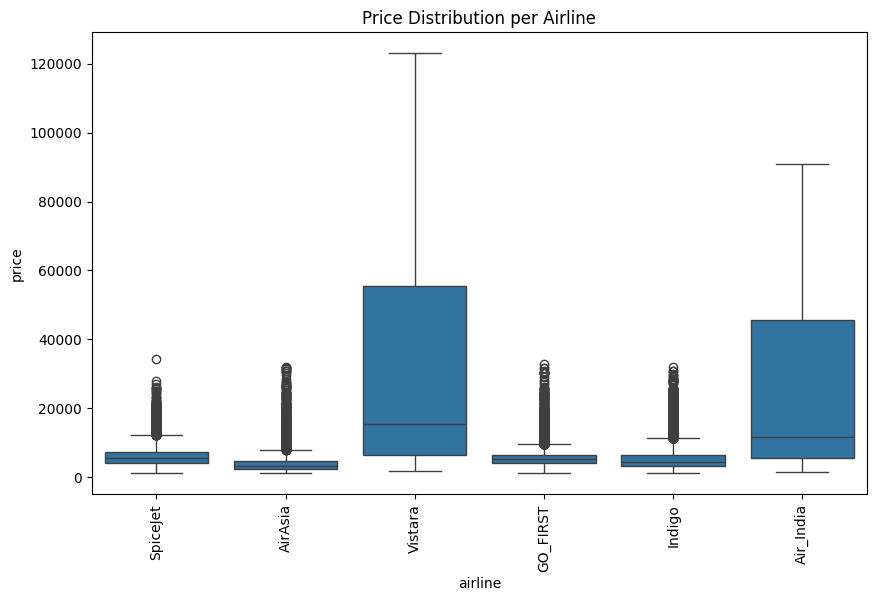

In [12]:
# Boxplot - Price by Airline
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="airline", y="price")
plt.xticks(rotation=90)
plt.title("Price Distribution per Airline")
plt.show()

C:\Users\shrey\AppData\Local\Temp\ipykernel_11700\1980182026.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="source_city", palette="Set2")


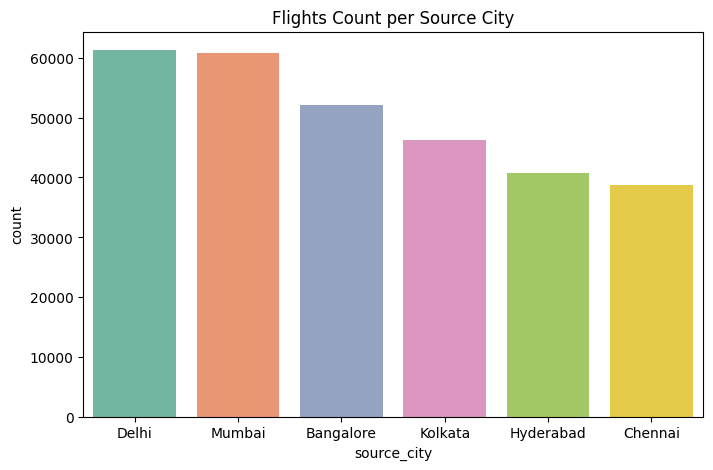

In [13]:
# Countplot - Flights by Source City
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="source_city", palette="Set2")
plt.title("Flights Count per Source City")
plt.show()

C:\Users\shrey\AppData\Local\Temp\ipykernel_11700\1966285071.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="class", y="duration", palette="muted")


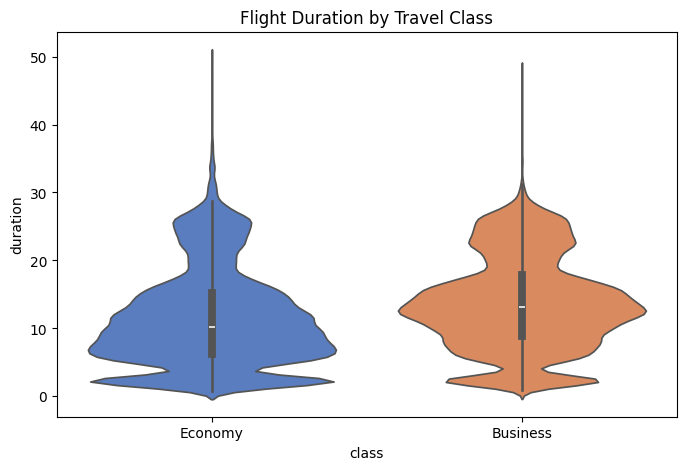

In [14]:
# Violinplot - Duration vs Class
plt.figure(figsize=(8,5))
sns.violinplot(data=df, x="class", y="duration", palette="muted")
plt.title("Flight Duration by Travel Class")
plt.show()

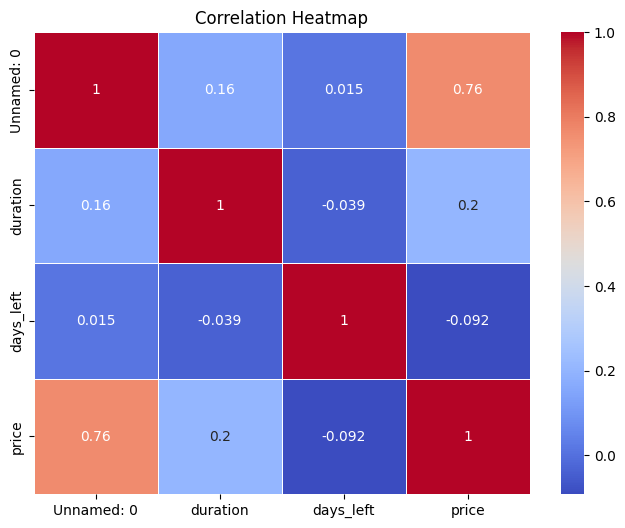

In [15]:
# Heatmap - Correlation
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

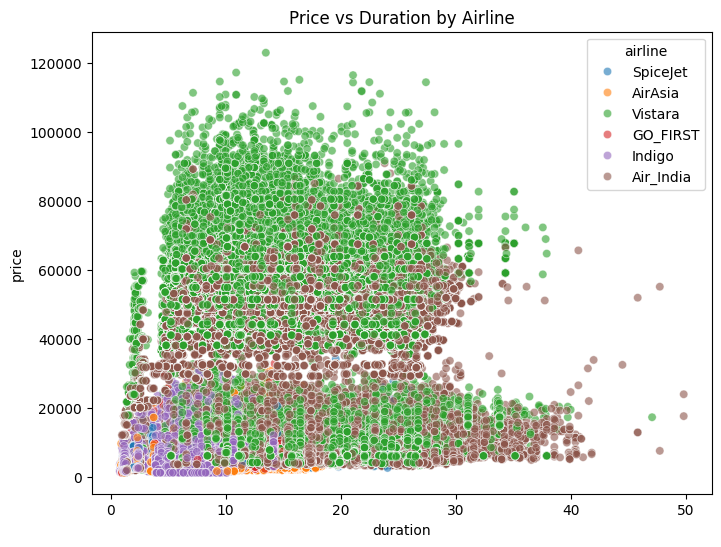

In [16]:
# Scatterplot - Price vs Duration colored by Airline
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="duration", y="price", hue="airline", alpha=0.6)
plt.title("Price vs Duration by Airline")
plt.show()

In [17]:
avg_price_airline = df.groupby("airline")["price"].mean().sort_values()
print(avg_price_airline)


airline
AirAsia       4091.072742
Indigo        5324.216303
GO_FIRST      5652.007595
SpiceJet      6179.278881
Air_India    23507.019112
Vistara      30396.536302
Name: price, dtype: float64


In [18]:
avg_duration_route = df.groupby(["source_city", "destination_city"])["duration"].mean().sort_values(ascending=False).head(10)
print(avg_duration_route)


source_city  destination_city
Kolkata      Chennai             14.774182
Chennai      Kolkata             14.515774
Bangalore    Chennai             14.480207
             Hyderabad           14.162433
Chennai      Bangalore           13.952594
Kolkata      Hyderabad           13.853108
             Bangalore           13.792947
Hyderabad    Kolkata             13.535322
             Chennai             13.293238
Mumbai       Hyderabad           13.263310
Name: duration, dtype: float64


In [19]:
cheapest_airline = df.groupby(["source_city", "destination_city"])["price"].idxmin()
print(df.loc[cheapest_airline, ["source_city", "destination_city", "airline", "price"]])


       source_city destination_city    airline  price
117897   Bangalore          Chennai    AirAsia   1603
86767    Bangalore            Delhi    AirAsia   2723
113144   Bangalore        Hyderabad     Indigo   1694
106867   Bangalore          Kolkata     Indigo   3026
96418    Bangalore           Mumbai    Vistara   2150
195250     Chennai        Bangalore    AirAsia   1443
184549     Chennai            Delhi    Vistara   2051
203807     Chennai        Hyderabad    AirAsia   1105
200692     Chennai          Kolkata     Indigo   2359
189241     Chennai           Mumbai    AirAsia   1830
12499        Delhi        Bangalore    AirAsia   3090
37113        Delhi          Chennai    AirAsia   1998
30331        Delhi        Hyderabad    Vistara   2022
22364        Delhi          Kolkata    AirAsia   2480
9377         Delhi           Mumbai   SpiceJet   2281
168544   Hyderabad        Bangalore     Indigo   1755
177386   Hyderabad          Chennai   GO_FIRST   1543
154114   Hyderabad          

In [20]:
corr = df["price"].corr(df["days_left"])
print("Correlation between Price and Days Left:", corr)


Correlation between Price and Days Left: -0.09194853217143828


In [21]:
df["price_per_hour"] = df["price"] / df["duration"]
print(df[["airline", "price_per_hour"]].groupby("airline").mean().sort_values("price_per_hour", ascending=False))


           price_per_hour
airline                  
Vistara       3056.101261
Air_India     2154.642634
Indigo        1151.469743
SpiceJet       952.920071
GO_FIRST       818.305440
AirAsia        666.389657


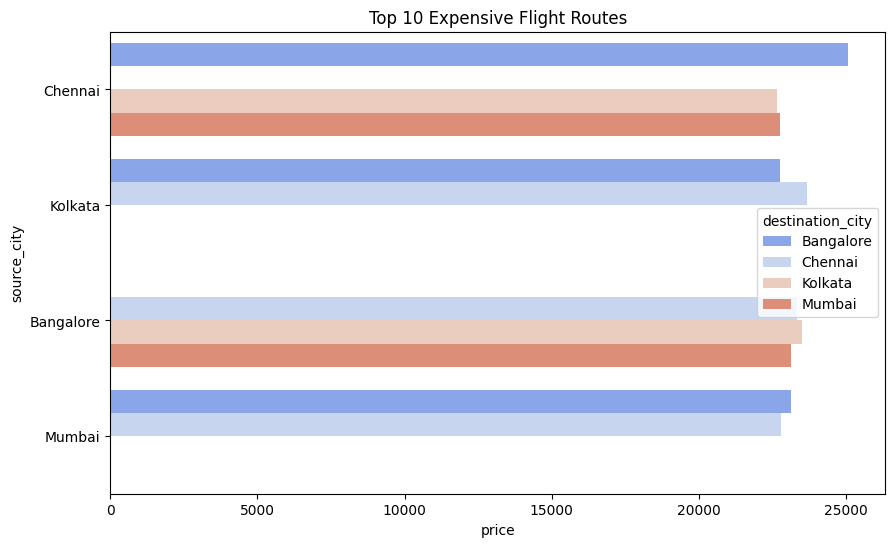

In [22]:
top_routes = df.groupby(["source_city","destination_city"])["price"].mean().nlargest(10).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=top_routes, x="price", y="source_city", hue="destination_city", palette="coolwarm")
plt.title("Top 10 Expensive Flight Routes")
plt.show()


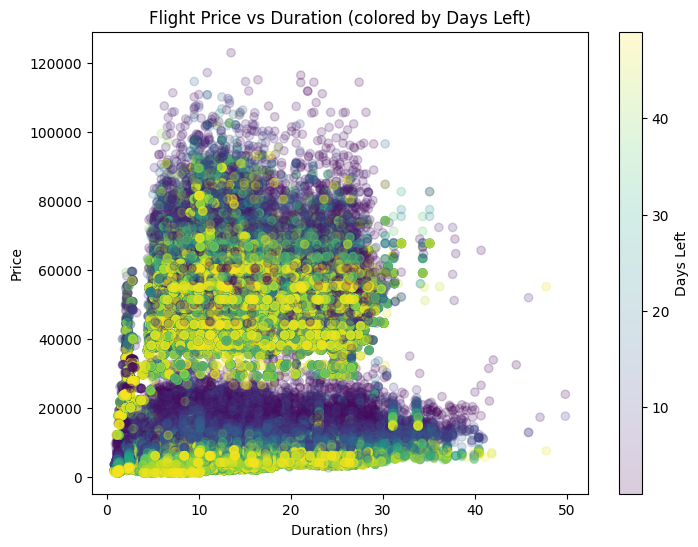

In [23]:
plt.figure(figsize=(8,6))
plt.scatter(df["duration"], df["price"], alpha=0.2, c=df["days_left"], cmap="viridis")
plt.colorbar(label="Days Left")
plt.xlabel("Duration (hrs)")
plt.ylabel("Price")
plt.title("Flight Price vs Duration (colored by Days Left)")
plt.show()


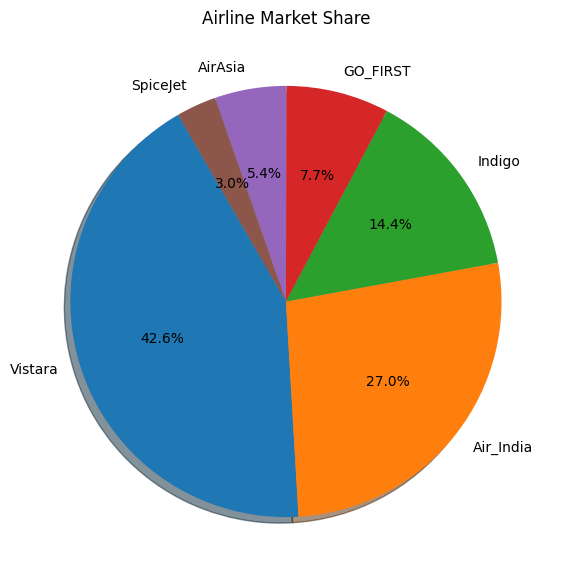

In [24]:
airline_share = df["airline"].value_counts()

plt.figure(figsize=(7,7))
plt.pie(airline_share, labels=airline_share.index, autopct="%1.1f%%", startangle=120, shadow=True)
plt.title("Airline Market Share")
plt.show()


C:\Users\shrey\AppData\Local\Temp\ipykernel_11700\1136722338.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="stops", y="price", palette="Set2")


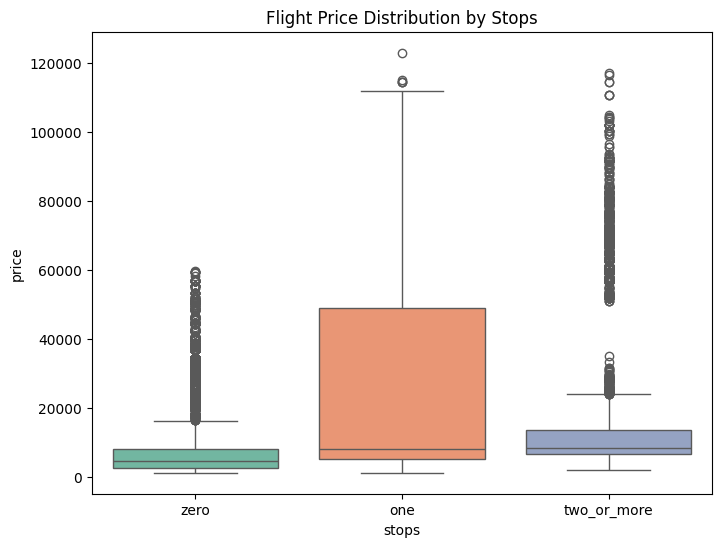

In [25]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="stops", y="price", palette="Set2")
plt.title("Flight Price Distribution by Stops")
plt.show()


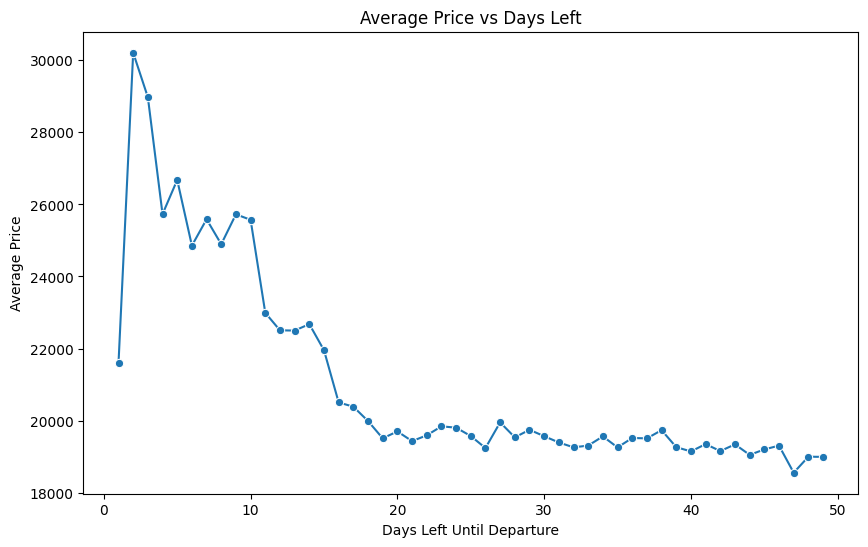

In [26]:
days_price = df.groupby("days_left")["price"].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=days_price, x="days_left", y="price", marker="o")
plt.title("Average Price vs Days Left")
plt.xlabel("Days Left Until Departure")
plt.ylabel("Average Price")
plt.show()
